In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [97]:
import ast
def open_data(path,format_file):
    if format_file=='text_dict':
        file = open(path+".txt", "r")
        contents = file.read()
        #display(contents)
        dictionary = ast.literal_eval(contents)
        return dictionary
#dict_ece_cohen = open_data('metrics/kappa_and_ece','text_dict')
dict_ece_cohen = open_data('metrics/tmp_dct_rf_gbdt_full2','text_dict')

In [98]:
def mod_dict(res_dict, type_to_compare):
    tot_dict = {}
    for model_name in res_dict.keys():
        modified_subdict = {}
        for dataset in res_dict[model_name].keys():
            data_set_dict = res_dict[model_name][dataset]
            data_set_dict = {key:val for key,val in data_set_dict.items() if isinstance(val,type_to_compare)}
            modified_subdict[dataset] = data_set_dict        
        tot_dict[model_name] = modified_subdict
    return tot_dict

In [99]:
new_dict = {}
for key_met in dict_ece_cohen.keys():
    new_dict[key_met] = mod_dict(dict_ece_cohen[key_met],tuple)


In [100]:
cohens_results = new_dict['cohen_kappa']
ece_results = new_dict['ece']


In [101]:
def plot_times_fill(df,color, ax= None,label = None, title=None, xlabel = 'Data Size',ylabel=None): 
    list_vals = []; data_size_list = [] 
    df = df.astype(float)
    for col in df.columns:
        list_vals.extend(df[col].to_list()); data_size_list.extend([col]*len(df[col]))
        #display(list_vals)
        #display(data_size_list)
    ax.scatter(data_size_list,list_vals,marker = '.',color= color)
    ax.fill_between(df.columns, df.min(),df.max(),alpha=0.2,color=color)
    df.mean().plot(color= color, ax=ax, label = label)
    ax.set_xlabel(xlabel);ax.set_ylabel(ylabel)
    ax.set_title(title)

In [102]:
np.arange(0, 1, 0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

<AxesSubplot:>

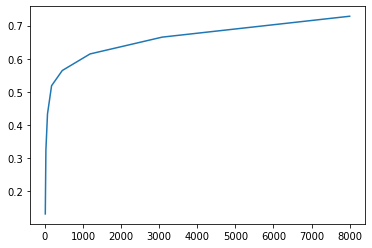

In [103]:
df_vals.astype(float).mean().plot()

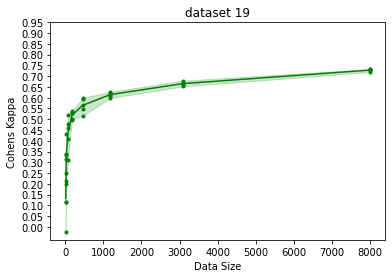

In [104]:
fig,ax = plt.subplots()
plot_times_fill(df_vals.astype(float),available_colors[model_num][0],ax,model_name, 'dataset %s'%dataset_num, ylabel ='Cohens Kappa')
ax.set_yticks(np.arange(0, 1, 0.05), minor=False);

C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Dropping of nuisance columns in DataFrame r

C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame r

C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
C:\Users\noga mudrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Dropping of nuisance columns in DataFrame r

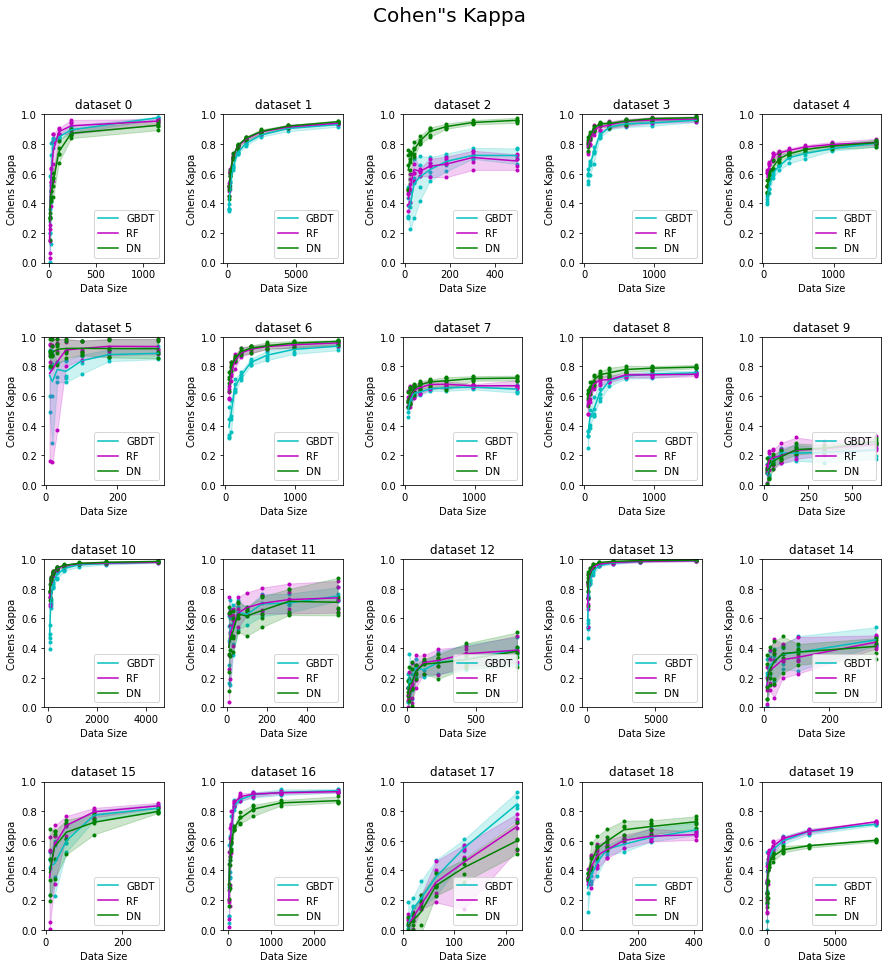

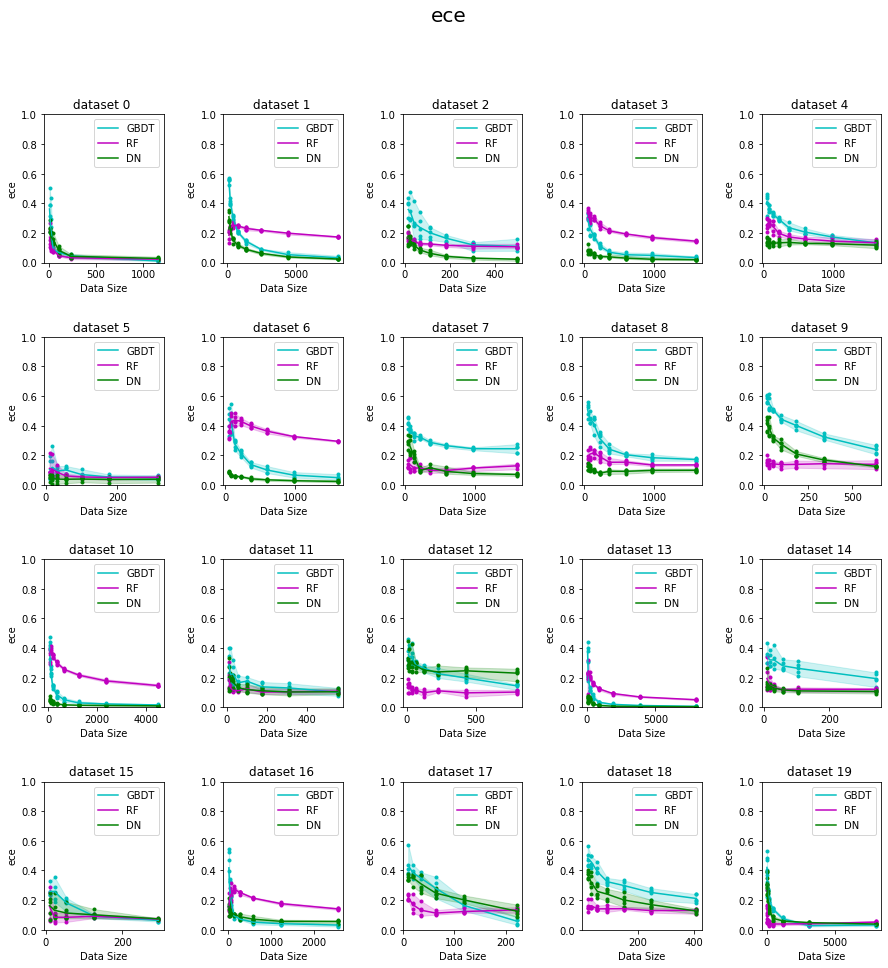

In [106]:
fig_cohen, axs_c = plt.subplots(4,5, figsize= (15,15))
fig_ece, axs_e = plt.subplots(4,5, figsize= (15,15))
fig_cohen, axs_c = plt.subplots(4,5, figsize= (15,15))
fig_ece, axs_e = plt.subplots(4,5, figsize= (15,15))
available_colors = np.array(['c','blue','m','purple','green','lightgreen','crimson','red']).reshape(-1,2)
means_dfs = {'ece':{},'cohen_kappa':{}}
if not isinstance(axs_c,np.ndarray):
    axs_c=[axs_c]
if not isinstance(axs_e,np.ndarray):
    axs_e=[axs_e]
axs_ef = axs_e.flatten(); axs_cf = axs_c.flatten()
for model_num, model_name in enumerate(cohens_results.keys()):
    means_dfs['ece'][model_name] = pd.DataFrame()
    means_dfs['cohen_kappa'][model_name] = pd.DataFrame()
    cur_colors = available_colors[model_num]
    for dataset_num in cohens_results[model_name].keys():
        
        df_vals = pd.DataFrame(ece_results[model_name][dataset_num])    
        df_vals_mean = df_vals.mean().to_frame().T; df_vals_mean.columns = np.arange(df_vals_mean.shape[1]); df_vals_mean.index = [dataset_num]
        means_dfs['ece'][model_name] = pd.concat([means_dfs['ece'][model_name],df_vals_mean])
        
        axs_ef[dataset_num].set_ylim([0,1])
        axs_cf[dataset_num].set_ylim([0,1])
        plot_times_fill(df_vals,available_colors[model_num][0],axs_ef[dataset_num],model_name, 'dataset %s '%dataset_num, ylabel ='ece')
        
        df_vals = pd.DataFrame(cohens_results[model_name][dataset_num])

        df_vals_mean = df_vals.mean().to_frame().T; df_vals_mean.columns = np.arange(df_vals_mean.shape[1]); df_vals_mean.index = [dataset_num]
        means_dfs['cohen_kappa'][model_name] = pd.concat([means_dfs['cohen_kappa'][model_name],df_vals_mean])
        plot_times_fill(df_vals,available_colors[model_num][0],axs_cf[dataset_num],model_name, 'dataset %s'%dataset_num, ylabel ='Cohens Kappa')

        axs_cf[dataset_num].legend(loc = 'lower right')
        axs_ef[dataset_num].legend(loc = 'upper right')
        
        
fig_cohen.suptitle('Cohen"s Kappa',fontsize= 20)        
fig_ece.suptitle('ece',fontsize = 20)
spacing = 0.5
fig_cohen.subplots_adjust(hspace= spacing,wspace= spacing)
fig_ece.subplots_adjust(hspace= spacing,wspace= spacing)

In [109]:
pd.DataFrame(cohens_results['GBDT'][dataset_num]).std()

10      0.228704
26      0.110455
68      0.028305
175     0.006109
456     0.015497
1185    0.026607
3079    0.017011
8000    0.006355
dtype: float64

In [28]:
dataset_num

0

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (17,7), sharey = True)
ax = axs[0]
sns.heatmap(means_dfs['ece']['GBDT'],annot = True, ax= ax,  vmin=0, vmax=1)
ax.set_ylabel('Dataset Number')
ax.set_xlabel(' ~~ sample size');
ax.set_title('ece')
ax2 = axs[1]
sns.heatmap(means_dfs['cohen_kappa']['GBDT'],annot = True, ax= ax2,  vmin=0, vmax=1)
ax2.set_ylabel('Dataset Number')
ax2.set_xlabel(' ~~ sample size');
ax2.set_title('cohen_kappa');

cohens_results = ["cohen_kappa"][model_name][dataset][real_sample_size]

ValueError: All arrays must be of the same length

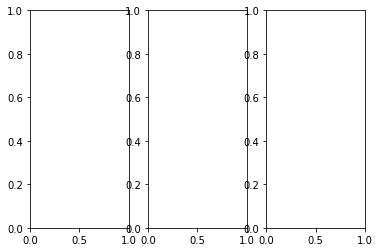

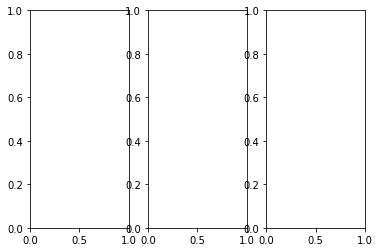

In [5]:
fig, axs = plt.subplots(1,len(cohens_results.keys()))
fig2, axs2 = plt.subplots(1,len(cohens_results.keys()))
available_colors = np.array(['c','blue','m','purple','green','lightgreen','crimson','red']).reshape(-1,2)
if not isinstance(axs,np.ndarray):
    axs=[axs]
if not isinstance(axs2,np.ndarray):
    axs2=[axs2]
for model_num, model_name in enumerate(cohens_results.keys()): 
    df_vals = pd.DataFrame(ece_results[model_name]).T
    plot_times_fill(df_vals,available_colors[model_num][0],axs[model_num],  'ece',model_name, ylabel ='ece')
    df_vals_cohens = pd.DataFrame(cohens_results[model_name]).T
    plot_times_fill(df_vals_cohens,available_colors[model_num][1],axs2[model_num],  'cohen kappa',model_name,ylabel= 'cohen kappa')
    axs[model_num].legend()
    axs2[model_num].legend()

In [7]:
ece_results[model_name].keys()

dict_keys([10, 22, 49, 108, 238, 524, 1158, 2556, 525, 2557, 130, 234, 422, 760, 1369, 2466, 4441, 8000, 15, 25, 41, 67, 111, 184, 303, 500, 50, 82, 135, 221, 362, 594, 975, 1600, 18, 32, 56, 100, 177, 315, 559, 560, 28, 52, 97, 182, 339, 632, 1178, 1179, 95, 181, 344, 654, 1243, 2364, 4496, 31, 99, 175, 311, 552, 19, 35, 65, 122, 229, 428, 800, 103, 213, 440, 909, 1876, 3875, 58, 105, 189, 341, 614, 190, 615, 23, 54, 126, 293, 680, 1582, 3680, 681, 1583, 3681, 136, 282, 588, 1225, 2552, 64, 119, 222, 412, 766, 413, 767, 20, 33, 55, 90, 150, 247, 409, 676, 677, 26, 68, 456, 1185, 3079])

In [4]:
dict_ece_cohen

{'cohen_kappa': {'GBDT': {10: [0.3261904295536012,
    0.06624762228826922,
    0.35253834596974254,
    0.37521999296022535,
    0.12637089966385942,
    0.8862052949372968,
    0.874439461883408,
    0.8027741655830083,
    0.7632968157301223,
    0.48591828036567997,
    0.11275964391691395,
    0.5229040622299048,
    0.3425659206736096,
    0.220012560184216,
    0.5550366911274183,
    -0.011627906976744207,
    0.026742537278121415,
    0.09817351598173507,
    0.11616161616161624,
    0.0032679738562092497,
    0.18185533306089086,
    0.10820648577101255,
    0.3124325224788204,
    0.1843346319458683,
    0.04615552881986218,
    0.18506887817065132,
    0.3076107695569218,
    0.2574697474546416,
    0.33507995302195326,
    0.4475718681978533,
    0.09920180614427195,
    0.1055658713051387,
    0.10531238698569383,
    -0.020285347217526617,
    0.1400730064526144,
    0.3203195006329461,
    -0.07968130786223093,
    0.21160572107824088,
    -0.05478221737817779,
    0.47